# ds major project verzeo - by pragati gupta - jan 2022 batch

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn 
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to C:\Users\Pragati
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("C:\\Users\\Pragati Gupta\\Downloads\\Corona_NLP.csv\\Corona_NLP.csv" , encoding= 'latin1')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [3]:
df = df.drop(['Location', 'TweetAt' , 'ScreenName' , 'UserName'],axis=1)
df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [4]:
df.isnull().any()

OriginalTweet    False
Sentiment        False
dtype: bool

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

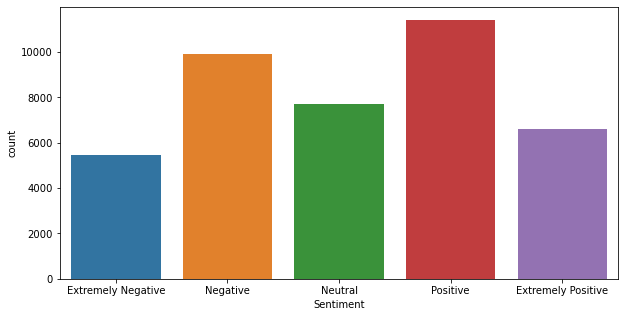

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], )

In [6]:
df.rename(columns = {'OriginalTweet':'tweet'}, inplace = True)

In [7]:
df

,tweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [8]:
df['tweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: tweet, Length: 41157, dtype: object

In [9]:
df.tweet[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [10]:
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [11]:
df.replace({'Sentiment' : { 'Extremely Negative' : -1, 'Negative' : -1, 'Neutral' : 0,'Extremely Positive' : 1, 'Positive' : 1, }},inplace=True)
df.Sentiment.value_counts()

 1    18046
-1    15398
 0     7713
Name: Sentiment, dtype: int64

In [12]:
df

,tweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,1
3,My food stock is not the only one which is emp...,1
4,"Me, ready to go at supermarket during the #COV...",-1
...,...,...
41152,Airline pilots offering to stock supermarket s...,0
41153,Response to complaint not provided citing COVI...,-1
41154,You know itÂs getting tough when @KameronWild...,1
41155,Is it wrong that the smell of hand sanitizer i...,0


In [13]:
reg = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
twt = []
for i in df["tweet"]:
    twt.append(reg.sub(" ", i))
df = pd.concat([df, pd.DataFrame(twt, columns=["Clean"])], axis=1, sort=False)
df

,tweet,Sentiment,Clean
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,Gahan https t co iFz9FAn2Pa and https ...
1,advice Talk to your neighbours family to excha...,1,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,1,Coronavirus Australia Woolworths to give elde...
3,My food stock is not the only one which is emp...,1,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",-1,Me ready to go at supermarket during the ou...
...,...,...,...
41152,Airline pilots offering to stock supermarket s...,0,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,-1,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,1,You know it s getting tough when is ration...
41155,Is it wrong that the smell of hand sanitizer i...,0,Is it wrong that the smell of hand sanitizer i...


In [14]:
df['Clean'] = df['Clean'].str.lower()
df

,tweet,Sentiment,Clean
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,gahan https t co ifz9fan2pa and https ...
1,advice Talk to your neighbours family to excha...,1,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,1,coronavirus australia woolworths to give elde...
3,My food stock is not the only one which is emp...,1,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",-1,me ready to go at supermarket during the ou...
...,...,...,...
41152,Airline pilots offering to stock supermarket s...,0,airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,-1,response to complaint not provided citing covi...
41154,You know itÂs getting tough when @KameronWild...,1,you know it s getting tough when is ration...
41155,Is it wrong that the smell of hand sanitizer i...,0,is it wrong that the smell of hand sanitizer i...


In [15]:
df_new = df[['Clean','Sentiment']]
df_new.head()

,Clean,Sentiment
0,gahan https t co ifz9fan2pa and https ...,0
1,advice talk to your neighbours family to excha...,1
2,coronavirus australia woolworths to give elde...,1
3,my food stock is not the only one which is emp...,1
4,me ready to go at supermarket during the ou...,-1


In [16]:
stop_words = set(stopwords.words('english'))     # make a set of stopwords
vectoriser = TfidfVectorizer(stop_words=None)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(df_new.Clean, df_new.Sentiment, test_size=0.25)

x_train = vectoriser.fit_transform(x_train)
x_test = vectoriser.transform(x_test)

In [18]:
len(y_test)

10290

In [19]:
# model 1

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

classifier = MultinomialNB()
classifier.fit(x_train, y_train)

# Prediction 1
y_pred = classifier.predict(x_test)
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(pred.head())
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm= confusion_matrix(y_test,y_pred)
print(cm)

       Actual  Predicted
27544      -1         -1
4867        1          1
6839        1          1
6521       -1         -1
13184       1          1
0.6327502429543246
              precision    recall  f1-score   support

          -1       0.76      0.61      0.68      3865
           0       0.92      0.01      0.01      1951
           1       0.58      0.92      0.71      4474

    accuracy                           0.63     10290
   macro avg       0.75      0.51      0.47     10290
weighted avg       0.71      0.63      0.57     10290

[[2364    0 1501]
 [ 392   12 1547]
 [ 338    1 4135]]


In [20]:
#model 2
from sklearn.neighbors import KNeighborsClassifier
import math

k = math.sqrt(len(y_test))
if k%2 ==0 :
    k=k+1
k = int(k)
k

101

In [21]:
classifier = KNeighborsClassifier(n_neighbors=k,p=2,metric='euclidean')
classifier.fit(x_train,y_train)

# Prediction 2

y_pred2 =  classifier.predict(x_test)
print(y_pred2)
cm= confusion_matrix(y_test,y_pred2)
print(cm)
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[-1  1  1 ...  1  1  1]
[[2499   69 1297]
 [ 460  378 1113]
 [ 677   92 3705]]
0.6396501457725947
              precision    recall  f1-score   support

          -1       0.69      0.65      0.67      3865
           0       0.70      0.19      0.30      1951
           1       0.61      0.83      0.70      4474

    accuracy                           0.64     10290
   macro avg       0.66      0.56      0.56     10290
weighted avg       0.65      0.64      0.61     10290



In [22]:
from sklearn import svm
new = svm.SVC(kernel ='linear', C = 1).fit(x_train, y_train)
y_pred3 = new.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print(y_pred3)
cm= confusion_matrix(y_test,y_pred3)
print(cm)

0.821865889212828
              precision    recall  f1-score   support

          -1       0.82      0.84      0.83      3865
           0       0.78      0.69      0.73      1951
           1       0.84      0.86      0.85      4474

    accuracy                           0.82     10290
   macro avg       0.81      0.80      0.80     10290
weighted avg       0.82      0.82      0.82     10290

[-1  1  1 ...  0  0  1]
[[3249  168  448]
 [ 303 1342  306]
 [ 405  203 3866]]


### Multinomial Naive Bayes - 63.2%
### KNN - 64%
### SVM - 82.2%

# therefore SVM  has the best results. 